In [77]:
from sklearn import svm
from sklearn.metrics import mean_squared_error

from sklearn.grid_search import GridSearchCV

from sklearn.cross_validation import KFold


from sklearn.metrics import make_scorer

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn import cross_validation

def mse( x1, x2):
    return mean_squared_error(x1,x2)

In [3]:
# Loading data
train_df = pd.read_csv("TrainingRidge.csv", names=['x1','x2','dens'], skiprows=1 )
train_df.describe()
#train_df

,x1,x2,dens
count,200.000000,200.000000,200.000000
mean,176.330000,78.500000,17.310000
std,19.917193,23.327901,9.683115
min,140.000000,40.000000,2.000000
25%,161.500000,59.500000,10.000000
50%,174.000000,77.000000,14.500000
75%,194.000000,98.000000,22.000000
max,210.000000,120.000000,53.000000


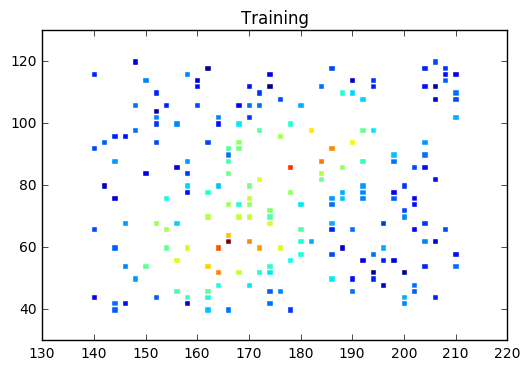

In [4]:
plt.scatter( train_df['x1'], train_df['x2'], c=train_df['dens'], marker="s", edgecolor="w" )
plt.title("Training")

In [5]:
val_df = pd.read_csv("ValidationRidge-Y.csv", names=['x1','x2','dens'], skiprows=1 )
val_df.describe()

,x1,x2,dens
count,1476.000000,1476.00000,1476.000000
mean,175.000000,80.00000,16.775068
std,20.783631,23.67234,8.869926
min,140.000000,40.00000,10.000001
25%,157.500000,60.00000,10.213602
50%,175.000000,80.00000,12.191091
75%,192.500000,100.00000,20.858823
max,210.000000,120.00000,44.011796


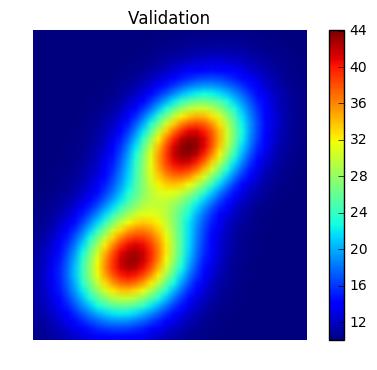

In [6]:

def plotOutput( preds, title="Something" ) :
    plt.title(title)
    plt.imshow( preds.reshape(41,36), origin="lower")
    plt.colorbar()
    plt.axis('off')
    
plotOutput( val_df['dens'].values, title="Validation")

In [7]:
naive_model = svm.NuSVR()

naive_model.fit( train_df[['x1','x2']].values, train_df['dens'].values )


NuSVR(C=1.0, cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, nu=0.5, shrinking=True, tol=0.001, verbose=False)

# A)

Generalization error : 76.7913


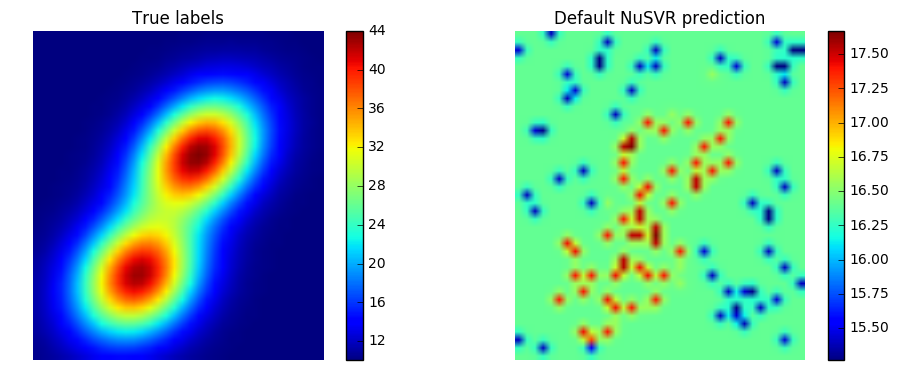

In [62]:
plt.rcParams["figure.figsize"] = [10,4]
def plotCompare( true_values, predicted_values, title="Prediction"):
    plt.subplot(1,2,1)
    plotOutput( true_values, title="True labels")
    plt.subplot(1,2,2)
    plotOutput( predicted_values, title=title)
    plt.tight_layout()
    print("Generalization error : %4.4f" % (mean_squared_error(true_values, predicted_values)) )
    
naive_preds = naive_model.predict( val_df[['x1','x2']] )
plotCompare(val_df['dens'].values, naive_preds, title="Default NuSVR prediction")

Generalization error : 71.3441


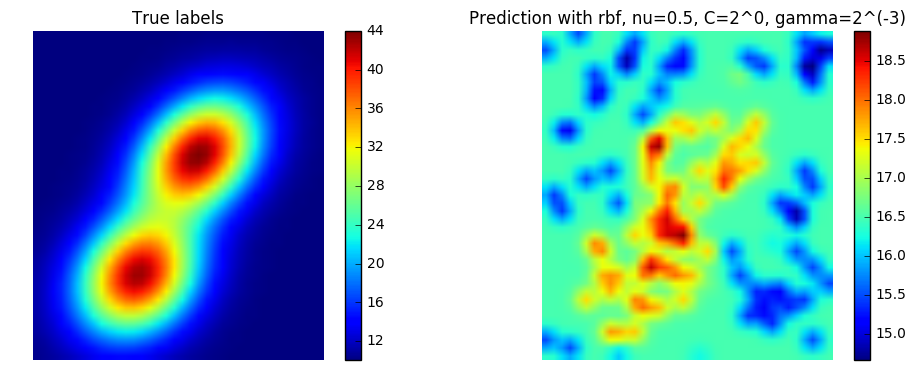

In [63]:
better_model = svm.NuSVR( kernel="rbf", nu=0.5, C=1, gamma=0.125)

better_model.fit( train_df[['x1','x2']].values, train_df['dens'].values )
preds = better_model.predict( val_df[['x1','x2']] )
plotCompare(val_df['dens'].values, preds, title="Prediction with rbf, nu=0.5, C=2^0, gamma=2^(-3)")


# B)

[-2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12]
sklearn.cross_validation.KFold(n=200, n_folds=10, shuffle=False, random_state=None)


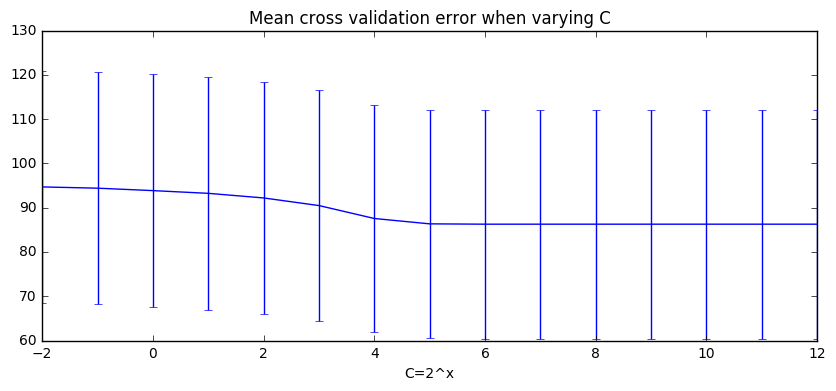

In [83]:
def plot_10Fold_C( X, y, ):
    fold = 10
    exp_range = np.arange(-2,13, step=1)
    print(exp_range)
    C = np.power(2.0, exp_range )
    results = np.zeros((len(C), 2))
    kf = KFold( len(y), fold)
    print(kf)
    for i in range(len(C)):
        scores = []
        c = C[i]
        for train_index, test_index in kf:
          model = svm.NuSVR( kernel="rbf", nu=0.5, C=c)  
          model.fit( X[train_index,:], y[train_index] )
          preds = model.predict( X[test_index,:] )
          scores.append( mean_squared_error(preds, y[test_index] ) )

        results[i,0] = np.mean(scores)
        results[i,1] = np.std(scores)

    plt.title("Mean cross validation error when varying C")
    plt.xlabel('C=2^x')
    plt.errorbar( exp_range, results[:,0], results[:,1] )
plot_10Fold_C( train_df[['x1','x2']].values, train_df['dens'].values)

In [12]:
gamma_range = np.power(2.0, np.arange(-12,1) )

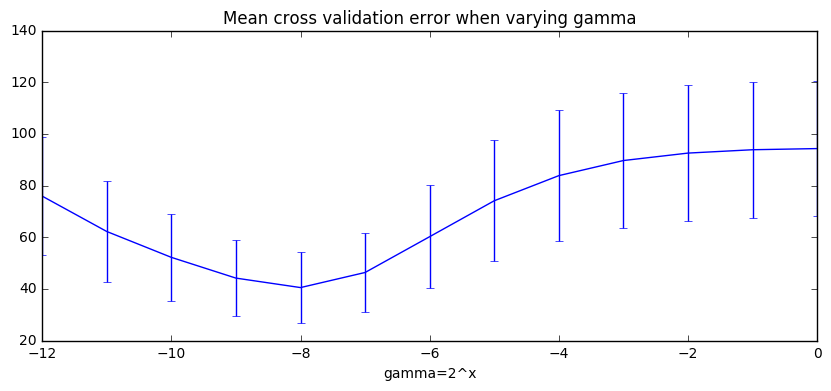

In [82]:
def plot_10Fold_Gamma( X, y):
    fold = 10

    kf = KFold( len(y), fold)
    exp_range = np.arange(-12,1)
    gamma = np.power(2.0, exp_range)

    results = np.zeros((len(gamma), 2))
    for i in range(len(gamma)):
        scores = []
        g = gamma[i]
        for train_index, test_index in kf:
          model = svm.NuSVR( kernel="rbf", nu=0.5, gamma=g)  
          model.fit( X[train_index,:], y[train_index] )
          preds = model.predict( X[test_index,:] )
          scores.append( mean_squared_error(preds, y[test_index] ) )

        results[i,0] = np.mean(scores)
        results[i,1] = np.std(scores)
        
    plt.title("Mean cross validation error when varying gamma")
    plt.xlabel('gamma=2^x')
    plt.errorbar( exp_range, results[:,0], results[:,1] )
plot_10Fold_Gamma( train_df[['x1','x2']].values, train_df['dens'].values)

# C)

In [45]:
# grid search
param_grid = {
    "C": np.power(2.0, np.arange(-2,13)),
    "gamma": np.power(2.0, np.arange(-12,1))
}

{'gamma': array([  2.44140625e-04,   4.88281250e-04,   9.76562500e-04,
         1.95312500e-03,   3.90625000e-03,   7.81250000e-03,
         1.56250000e-02,   3.12500000e-02,   6.25000000e-02,
         1.25000000e-01,   2.50000000e-01,   5.00000000e-01,
         1.00000000e+00]), 'C': array([  2.50000000e-01,   5.00000000e-01,   1.00000000e+00,
         2.00000000e+00,   4.00000000e+00,   8.00000000e+00,
         1.60000000e+01,   3.20000000e+01,   6.40000000e+01,
         1.28000000e+02,   2.56000000e+02,   5.12000000e+02,
         1.02400000e+03,   2.04800000e+03,   4.09600000e+03])}


In [48]:
grid_clf = GridSearchCV( svm.NuSVR(kernel='rbf', nu=0.5), param_grid, cv=10, scoring="mean_squared_error")
grid_clf.fit( train_df[['x1','x2']], train_df['dens'] )

GridSearchCV(cv=10, error_score='raise',
       estimator=NuSVR(C=1.0, cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, nu=0.5, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': array([  2.44141e-04,   4.88281e-04,   9.76562e-04,   1.95312e-03,
         3.90625e-03,   7.81250e-03,   1.56250e-02,   3.12500e-02,
         6.25000e-02,   1.25000e-01,   2.50000e-01,   5.00000e-01,
         1.00000e+00]), 'C': array([  2.50000e-01,   5.00000e-01,   1.00000e+0...,   1.28000e+02,   2.56000e+02,   5.12000e+02,
         1.02400e+03,   2.04800e+03,   4.09600e+03])},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [58]:
print("Best Cross validation scores %4.4f" % -grid_clf.best_score_)
print(grid_clf.best_params_)
best_params = grid_clf.best_params_

Best Cross validation scores 18.0978
{'gamma': 0.00390625, 'C': 16.0}


In [69]:
## Plot result and compare with naive model
# best_model = svm.NuSVR(kernel='rbf', nu=0.5, C=best_params['C'], gamma=best_params['gamma'] )

# best_model.fit( train_df[['x1','x2']], train_df['dens'] )

NuSVR(C=16.0, cache_size=200, coef0=0.0, degree=3, gamma=0.00390625,
   kernel='rbf', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
   verbose=False)

In [88]:
best_preds = grid_clf.best_estimator_.predict( val_df[['x1','x2']])

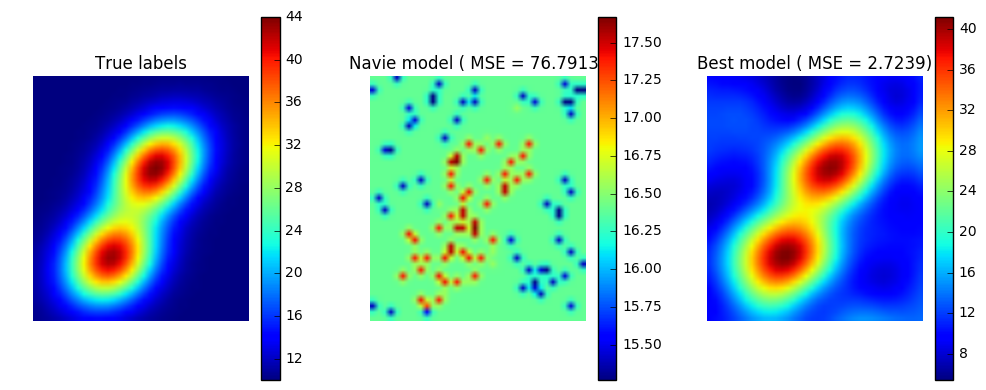

In [89]:
plt.subplot(1,3,1)
plotOutput( val_df['dens'].values, title="True labels")
plt.subplot(1,3,2)
plotOutput( naive_preds, title="Navie model ( MSE = %4.4f)" % mse(val_df['dens'], naive_preds))
plt.subplot(1,3,3)
plotOutput( best_preds, title="Best model ( MSE = %4.4f)" % mse(val_df['dens'], best_preds))
plt.tight_layout()


In [132]:
# print(grid_clf.results_)
# print( type(grid_clf.grid_scores_[0]) )
def extract_score( grid_scores ) :
    gammas = []
    cs = []
    mses = []
    for i in range(len(grid_scores)):
        params, me, _ = grid_scores[i]
        mses.append(-me)
        gammas.append(params['gamma'])
        cs.append(params['C'])
    return mses, cs, gammas
results = extract_score( grid_clf.grid_scores_ )

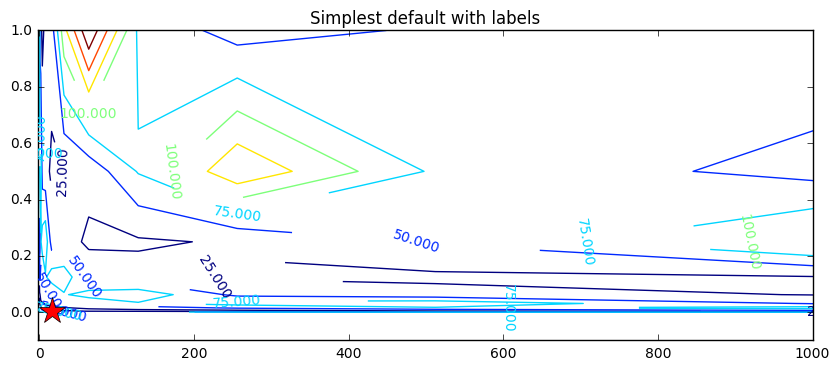

In [166]:

# print(len(results[1]))

z = np.array(results[0]).reshape( ( len(param_grid['gamma']), len(param_grid['C']) ) )

contour_plot = plt.contour( param_grid['C'], param_grid['gamma'], z, zorder=1)
plt.clabel(contour_plot, inline=1, fontsize=10, zorder=1)
plt.plot( best_params['C'], best_params['gamma'], marker='*', color='r', markersize=20, zorder=100)

plt.xlim(-2, 1000)
plt.ylim(-0.1, 1)
plt.title('Simplest default with labels')